In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BIPA_data.csv", index_col = 0)

In [3]:
winrate = []
for i in range(40):
    newdata = data[data['wardPlaced'] == i]
    winrate.append(len(newdata[newdata['result'] == 'WIN']) /
                   (len(newdata[newdata['result'] == 'WIN']) + 
                  len(newdata[newdata['result'] == 'LOSE'])))

In [4]:
data_ward = data[data['wardPlaced'].isin(range(0, 40))]
group_ward = data_ward.groupby("wardPlaced", as_index = False).count()

In [5]:
winrate_df = pd.DataFrame(winrate, columns = ['win_rate'])

In [6]:
total_group = pd.concat([group_ward, winrate_df], axis = 1)

In [7]:
total_group = total_group[['wardPlaced', 'win_rate']]

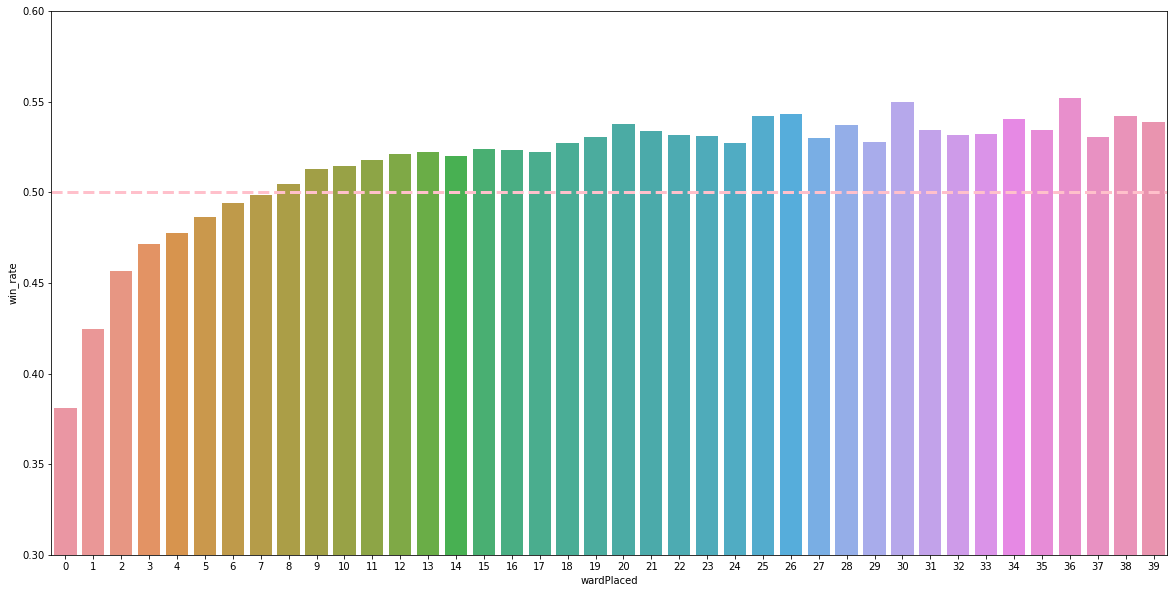

In [8]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data = total_group, 
            x = 'wardPlaced', y = 'win_rate')
ax.set_ylim(0.3, 0.6)
ax.axhline(0.5, ls = '--', lw = 3, color = 'pink')